# Australian Rooftop Photovoltaic (PV) Energy Data

This notebook describes the provenance of **actual** rooftop PV energy production for Australian states, as prepared and distributed by AEMO. Rooftop PV production is measured using two different methods:
    - Satellite data
    - Self-reported actual measurements

The datasets for each measurement method are dealt with separately throughout.

### Data source, downloading and unzipping
Data is available at these URLs.

- Current actual PV measurements:
http://nemweb.com.au/Reports/CURRENT/ROOFTOP_PV/ACTUAL/

- Archived actual PV measurements:
http://nemweb.com.au/Reports/ARCHIVE/ROOFTOP_PV/ACTUAL/

The data is presented as individual .CSV files, each compressed into a .ZIP archive. All data for both CURRENT and ARCHIVE datasets was downloaded to the local workstation using the *wget* command:
    example: wget -r -np http://nemweb.com.au/Reports/CURRENT/ROOFTOP_PV/ACTUAL/

Individual .CSV files were unzipped, and merged together into a set of 4  large .CSV files:

### .CSV file merging and pre-processing

Preprocessing commands:

For current MEASUREMENT files
1: head -2 ./current/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20220305093000_0000000358943236.csv | tail -n 1 > current_measurement.csv
2: gtail --quiet -n +3  ./current/*MEASUREMENT*.csv | sed '/END OF REPORT/d' >> current_measurement.csv

For current SATELLITE files
head -2 ./current/PUBLIC_ROOFTOP_PV_ACTUAL_SATELLITE_20220305160000_0000000358958976.csv | tail -n 1 > current_satellite.csv

For archive files, the number of files to process was too large if attempted all in one go. File lists were split up by methodology and year.
- For archive SATELLITE files
head -2 ./archive/PUBLIC_ROOFTOP_PV_ACTUAL_SATELLITE_20220216080000_0000000357965347.csv | tail -n 1 > archive_satellite.csv
gtail --quiet -n +3  ./archive/*SATELLITE_2021*.csv | sed '/END OF REPORT/d' >> archive_satellite.csv
gtail --quiet -n +3  ./archive/*SATELLITE_2022*.csv | sed '/END OF REPORT/d' >> archive_satellite.csv

- For archive MEASUREMENT files
head -2 ./archive/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20211229233000_0000000355230540.csv | tail -n 1 > archive_measurement.csv
gtail --quiet -n +3  ./archive/*MEASUREMENT_2021*.csv | sed '/END OF REPORT/d' >> archive_measurement.csv
gtail --quiet -n +3  ./archive/*MEASUREMENT_2022*.csv | sed '/END OF REPORT/d' >> archive_measurement.csv



In [46]:
import pandas as pd
import seaborn as sns


In [39]:
# Load the archive and current datasets for both direct measurement and satellite rooftop PV
DATA_PATH = "../../data/rooftop_pv/"

archive_measurement_df = pd.read_csv(DATA_PATH+"archive_measurement.csv")
archive_satellite_df = pd.read_csv(DATA_PATH+"archive_satellite.csv")
current_measurement_df = pd.read_csv(DATA_PATH+"current_measurement.csv")
current_satellite_df = pd.read_csv(DATA_PATH+"current_satellite.csv")


In [40]:
# Merge the archive and current satellite, and the archive and current direct measurement.
satellite_merge_df = pd.concat([current_satellite_df, archive_satellite_df])
measurement_merge_df = pd.concat([current_measurement_df, archive_measurement_df])

# Convert the INTERVAL_DATETIME fields to Pandas datetime format for sorting.
satellite_merge_df.INTERVAL_DATETIME = pd.to_datetime(satellite_merge_df.INTERVAL_DATETIME)
measurement_merge_df.INTERVAL_DATETIME = pd.to_datetime(measurement_merge_df.INTERVAL_DATETIME)



In [44]:
satellite_merge_df.dtypes

I                            object
ROOFTOP                      object
ACTUAL                       object
2                             int64
INTERVAL_DATETIME    datetime64[ns]
REGIONID                     object
POWER                       float64
QI                          float64
TYPE                         object
LASTCHANGED                  object
dtype: object

In [47]:
satellite_merge_df.head(5)

,I,ROOFTOP,ACTUAL,2,INTERVAL_DATETIME,REGIONID,POWER,QI,TYPE,LASTCHANGED
0,D,ROOFTOP,ACTUAL,2,2021-02-03 23:30:00,NSW1,0.0,0.6,SATELLITE,2021/02/03 23:50:33
9,D,ROOFTOP,ACTUAL,2,2021-02-03 23:30:00,VIC1,0.0,0.6,SATELLITE,2021/02/03 23:50:33
8,D,ROOFTOP,ACTUAL,2,2021-02-03 23:30:00,TASS,0.0,0.6,SATELLITE,2021/02/03 23:50:33
7,D,ROOFTOP,ACTUAL,2,2021-02-03 23:30:00,TASN,0.0,0.6,SATELLITE,2021/02/03 23:50:33
6,D,ROOFTOP,ACTUAL,2,2021-02-03 23:30:00,TAS1,0.0,0.6,SATELLITE,2021/02/03 23:50:33


In [45]:
# Sort by INTERVAL_DATETIME in ascending order and write out to .CSV

satellite_merge_df = satellite_merge_df.sort_values(by='INTERVAL_DATETIME', ascending=True)
measurement_merge_df = measurement_merge_df.sort_values(by='INTERVAL_DATETIME', ascending=True)

# .CSV files are written, this section now commented out.
#satellite_merge_df.to_csv(DATA_PATH+"rooftop_pv_satellite.csv")
#measurement_merge_df.to_csv(DATA_PATH+"rooftop_pv_measurement.csv")

## Simple EDA: plotting daily PV production in NSW for year-to-date (2022)

<AxesSubplot:xlabel='INTERVAL_DATETIME', ylabel='POWER'>

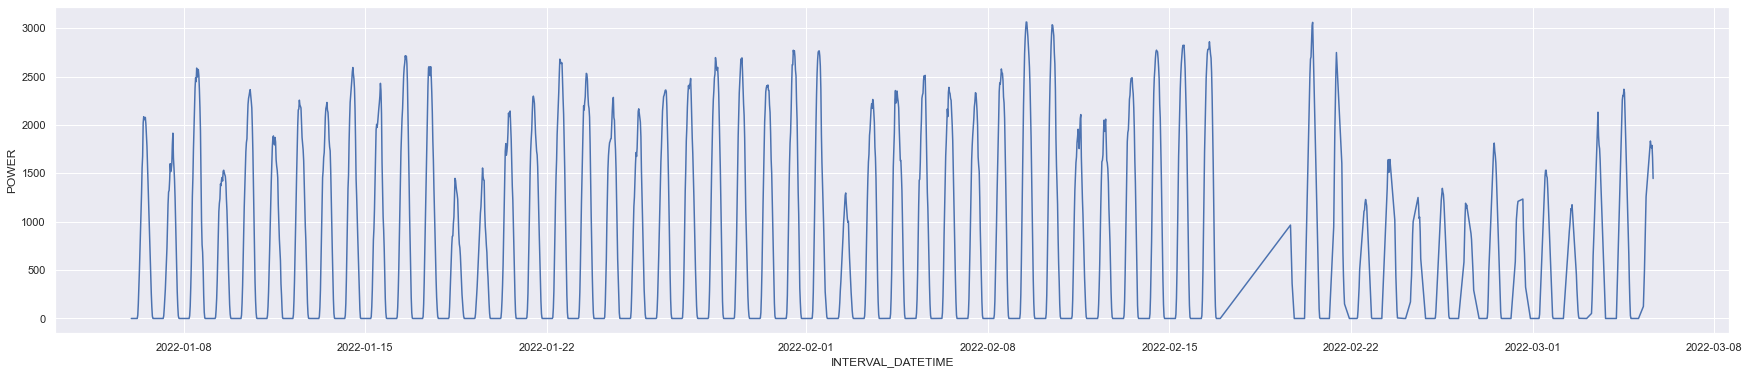

In [58]:
sns.set(rc={"figure.figsize": (30,6)})
sns.lineplot(x='INTERVAL_DATETIME', y='POWER', data=measurement_merge_df[(measurement_merge_df.INTERVAL_DATETIME >= '2022-01-01') & (measurement_merge_df.REGIONID == 'NSW1')])